In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.transpiler import PassManager
#from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.providers.ibmq import least_busy
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.aqua.algorithms import QPE
from qiskit.aqua import QuantumInstance
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua import Operator
from qiskit.aqua.components.iqfts import Standard
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def matrixHamiltonian(tam, freq): #tam 4, estados 0 a 3
    h = 6.582119624 * 10**(-16)
    E = [h*freq*(i+1/2) for i in range(tam)]
    L = []
    for i in range(tam):
        L.append(list())
        for j in range(tam):
            if i==j: L[i].append(E[i])
            else: L[i].append(0)
    m = np.matrix(L)
    return m


In [9]:
def eigenvalues(m, q_bits, n_ancillae):
    result_qpe = []
    for i in range(2**q_bits):
        op = Operator(matrix=m)
        eig_res = ExactEigensolver(op, k=2**q_bits)
        eig_res = eig_res.run()
        eigv = eig_res['eigvecs']

        state = Custom(q_bits, state_vector=eigv[i])

        num_time_slices = 50
        iqft = Standard(n_ancillae)

        qpe = QPE(op, state, iqft, num_time_slices, n_ancillae, expansion_mode='suzuki',
                  expansion_order=2, shallow_circuit_concat=True)

        backend = BasicAer.get_backend('qasm_simulator')
        quantum_instance = QuantumInstance(backend, shots=100, pass_manager=PassManager())
        result_qpe.append(qpe.run(quantum_instance))
    return result_qpe

In [1]:
q_bits = 2
m, n_ancillae = matrixHamiltonian(2**q_bits, 10**16), 7
result_qpe = []
op = Operator(matrix=m)
eig_res = ExactEigensolver(op, k=2**q_bits)
eig_res = eig_res.run()
eigv = eig_res['eigvecs']

state = Custom(q_bits, state_vector=eigv[i])

num_time_slices = 50
iqft = Standard(n_ancillae)

qpe = QPE(op, state, iqft, num_time_slices, n_ancillae, expansion_mode='suzuki',
          expansion_order=2, shallow_circuit_concat=True)

#qpe.construct_circuit(measurement = True).draw()

NameError: name 'matrixHamiltonian' is not defined

In [22]:
q_bits = 2                             
m = matrixHamiltonian(2**q_bits, 10**16)
results = []
for i in range(7,12,2):
    results.append(eigenvalues(m, q_bits, i))
print(results)

[[{'translation': 23.037418683999995, 'stretch': 0.021703820504302473, 'top_measurement_label': '1001001', 'top_measurement_decimal': 0.5703125, 'eigvals': [3.239637002437501], 'energy': 3.239637002437501}, {'translation': 23.037418683999995, 'stretch': 0.021703820504302473, 'top_measurement_label': '1011011', 'top_measurement_decimal': 0.7109375, 'eigvals': [9.7189110073125], 'energy': 9.7189110073125}, {'translation': 23.037418683999995, 'stretch': 0.021703820504302473, 'top_measurement_label': '1101110', 'top_measurement_decimal': 0.859375, 'eigvals': [16.558144679125], 'energy': 16.558144679125}, {'translation': 23.037418683999995, 'stretch': 0.021703820504302473, 'top_measurement_label': '0000000', 'top_measurement_decimal': 0.0, 'eigvals': [-23.037418683999995], 'energy': -23.037418683999995}], [{'translation': 23.037418683999995, 'stretch': 0.021703820504302473, 'top_measurement_label': '100100101', 'top_measurement_decimal': 0.572265625, 'eigvals': [3.3296269191718757], 'energy

In [29]:
num_ancillae = math.floor((12-7)/2)

In [50]:
energiasR = [m.item(i,i) for i in range(2**q_bits)]
energias = []
for j in range(num_ancillae+1):
    energias.append([abs(results[j][i]["energy"]) for i in range(2**q_bits)]) 


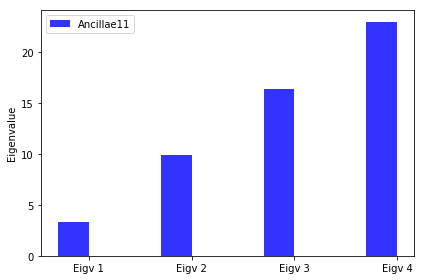

In [52]:
fig, ax = plt.subplots()

index = np.arange(2**q_bits)

bar_width = 0.3
opacity = 0.8

rects= plt.bar(index, energias[2], bar_width, alpha=opacity, color = 'b', label='Ancillae' + str(11))

plt.xticks(index + bar_width/2, ('Eigv 1', 'Eigv 2', 'Eigv 3', 'Eigv 4'))
plt.xlabel('')
plt.ylabel('Eigenvalue')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
for j in range(num_ancillae+1):
    energias[j] = [abs(energias[j][i]-energiasR[i]) for i in range(2**q_bits)]

In [47]:
print(energias)

[[0.051422809562498895, 0.1542684286874998, 0.10284561912500223, 3.552713678800501e-15], [0.038567107171875836, 0.02571140478124967, 0.012855702390620394, 3.552713678800501e-15], [0.006427851195311529, 0.003213925597657763, 0.009641776792971513, 3.552713678800501e-15]]


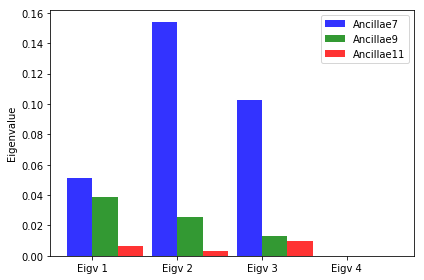

In [46]:
fig, ax = plt.subplots()

index = np.arange(2**q_bits)

bar_width = 0.3
opacity = 0.8

color = ['b', 'g', 'r', 'k']

for i in range(num_ancillae+1):
    rects= plt.bar(index + bar_width*i, energias[i], bar_width, alpha=opacity, color=color[i],label='Ancillae' + str(7+i*2))

plt.xticks(index + bar_width/2, ('Eigv 1', 'Eigv 2', 'Eigv 3', 'Eigv 4'))
plt.xlabel('')
plt.ylabel('Eigenvalue')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()

index = np.arange(2**q_bits)

bar_width = 0.3
opacity = 0.8

color = ['b', 'g', 'r', 'k']

for i in range(num_ancillae+1):
    rects= plt.bar(index + bar_width*i, energias[i], bar_width, alpha=opacity, color=color[i],label='Ancillae' + str(7+i*2))

plt.xticks(index + bar_width/2, ('Eigv 1', 'Eigv 2', 'Eigv 3', 'Eigv 4'))
plt.xlabel('')
plt.ylabel('Eigenvalue')
plt.legend()


plt.tight_layout()
plt.show()